# Assignment #2


Deep Learning / Fall 1398, Iran University of Science and Technology



---



**Please pay attention to these notes:**

<br/>
- **Assignment Due: ** 1398/9/23 23:59
- If you need any additional information, please review the assignment page on the course website.
- We always recommend co-operation and discussion in groups for assignments. However, each student has to finish all the questions by himself/herself. If our matching system identifies any sort of copying, you'll be responsible for consequences. So, please mention his/her name if you have a team-mate.
- Students who audit this course should submit their assignments like other students to be qualified for attending the rest of the sessions.
- Finding any sort of copying will zero down that assignment grade and also will be counted as two negative assignment for your final score.
- When you are ready to submit, please follow the instructions at the end of this notebook.
- If you have any questions about this assignment, feel free to drop us a line. You may also post your questions on the course Forum page.
- You must run this notebook on Google Colab platform, it depends on Google Colab VM for some of its dependencies.
- **Before starting to work on the assignment Please fill your name in the next section *AND Remember to RUN the cell.* **

<br/>


Assignment Page: []()

Course Forum: [https://groups.google.com/forum/#!forum/dl981/](https://groups.google.com/forum/#!forum/dl981/)



---



Fill your information here & run the cell

In [115]:
#@title Enter your information & "RUN the cell!!" { run: "auto" }
student_id =  95521279#@param {type:"integer"}
student_name = "Ali_Safarpoor_Dehkordi" #@param {type:"string"}
Your_Github_account_Email = "alisafarpoor1108@gmail.com" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)


from pathlib import Path

ASSIGNMENT_PATH = Path('asg02')
ASSIGNMENT_PATH.mkdir(parents=True, exist_ok=True)

your student id: 95521279
your name: Ali_Safarpoor_Dehkordi


# 1. Special Bus Line

Consider the public transport bus service. It has many gates on roads in the city and a particular lane for bus transportation.


This lane is also used for the transportation of emergency vehicles like ambulances, police cars and fire trucks, and private cars are banned from using it.


Your task is to create a system to classify these two classes of vehicles.

### Dataset
---
In this task, you should build your dataset based on an arbitrary approach. Of course, we suggest having a look at [this](https://forums.fast.ai/t/tips-for-building-large-image-datasets/26688) link if you do not have any idea about making the dataset.



Please explain your dataset making method.

بتدا سعی شد با گوگل ای پی آی ها کار کنم اما متاسفانه با کلید واژه های مختلف تست شد ولی نتایج مطلوبی حاصل نمیشد. سعی شد دیتاست مناسب پیدا کنم اما نتیجه ای نداشت.

در نهایت شروع به ساخت یک دیتا ست با عکسهای انتخابی کردم. و همچنین دیتای جمع اوری شده مشکلی که داشت وجود تبلیغات و کلمات نامربوط بود که به صورت دستی ادیت و حذف شدند. در نهایت دیتاست را در گوگل درایو آپلود نمودم که لینک زیر برای دسترسی به آن هست: https://drive.google.com/file/d/13tTX9n2GXiJhnfZdFnuorbcoEPVWndwp/view?usp=sharing
اما متاسفانه نشان میداد تعداد دیتا تهیه شده کافی نبوده و مشکل فیت شدن روی دیتای ترین مشهود بود. و ناچارا از همان روش پیشنهادی استفاده نمودبم.

### Implementation
---
You can use from Keras in this assignment.

Preprocess your data in this cell.

In [95]:
###ravesh e piyade shode dar halat dataset dasti:
'''
from google.colab import drive
drive.mount('/content/gdrive')

%cd gdrive/My Drive/
!unzip dataset.zip

%cd dataset

import os
cwd = os.getcwd()
print(cwd)
subfoldernames=os.listdir()
#['amboulance', 'fire', 'non', 'police']
list1=[]#urgency cars
list2=[]#nonurgency cars
for i in os.listdir("amboulance"):
  list1.append("amboulance/"+i)
for i in os.listdir("fire"):
  list1.append("fire/"+i)
for i in os.listdir("non"):
  list2.append("non/"+i)
for i in os.listdir("police"):
  list1.append("police/"+i)
labels=[0 for i in list1]+[1 for i in list2]
datas=list1+list2
# print(len(list1))
# print(len(list2))
# for i in range(0,147,10):
    # print(labels[i],datas[i])
index=[i for i in range(0,len(labels))]
import cv2
import random
import numpy as np

X_train=[]
Y_train=[]
for i in index:
  img=cv2.imread(datas[i])
  # print(img.shape)
  # img = cv2.resize(img,(300, 300, 3))
  dim = (300,300)
  resized = cv2.resize(img, dim)
  X_train.append(np.copy(resized))
  Y_train.append(labels[i])
Y_train=np.array(Y_train)
X_train=np.array(X_train)
print(X_train[0].shape)
print(X_train.shape)
print(Y_train.shape)



# example of brighting image augmentation
from numpy import expand_dims
import cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
new_x=[]
new_y=[]
# new_im=[]
c=0
name_counter=0
XTEST=X_train[120:]
YTEST=Y_train[120:]
X_train=X_train[:12]
Y_train=Y_train[:12]
for i in range(len(X_train)):
    print(c*100//len(X_train),end=" ")
    c+=1
    # load the image
    img = np.copy(X_train[i])
    label=np.copy(Y_train[i])
    # convert to numpy array
    data = img_to_array(img)
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # create image data augmentation generator
    datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(9):
        # generate batch of images
        batch = it.next()
        batch=batch[0]
        # print(batch)
        new_x.append(str(name_counter)+".jpg")
        # new_im.append(batch)
        new_y.append(Y_train[i])
        cv2.imwrite(str(name_counter)+".jpg",batch)
        name_counter+=1
    datagen = ImageDataGenerator(width_shift_range=[-100,100])
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(5):
      # generate batch of images
      batch = it.next()
      batch=batch[0]
      new_x.append(str(name_counter)+".jpg")
      # new_im.append(batch)
      new_y.append(Y_train[i])
      cv2.imwrite(str(name_counter)+".jpg",batch)
      name_counter+=1
    datagen = ImageDataGenerator(height_shift_range=0.5)
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(5):
      # generate batch of images
      batch = it.next()
      batch=batch[0]
      new_x.append(str(name_counter)+".jpg")
      # new_im.append(batch)
      new_y.append(Y_train[i])
      cv2.imwrite(str(name_counter)+".jpg",batch)
      name_counter+=1
    datagen = ImageDataGenerator(horizontal_flip=True)
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(5):
      # generate batch of images
      batch = it.next()
      batch=batch[0]
      new_x.append(str(name_counter)+".jpg")
      # new_im.append(batch)
      new_y.append(Y_train[i])
      cv2.imwrite(str(name_counter)+".jpg",batch)
      name_counter+=1
    datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(5):
      # generate batch of images
      batch = it.next()
      batch=batch[0]
      new_x.append(str(name_counter)+".jpg")
      # new_im.append(batch)
      new_y.append(Y_train[i])
      cv2.imwrite(str(name_counter)+".jpg",batch)
      name_counter+=1
new_x=np.array(new_x)
new_y=np.array(new_y)
print(new_x.shape)
print(new_y.shape)
print(Y_train.shape)
print(name_counter)
from google.colab.patches import cv2_imshow
new_x=np.array(new_x)
new_y=np.array(new_y)

from google.colab.patches import cv2_imshow

import os.path
new_im=[]
if os.path.isfile('0.jpg'):
    print ("File exist")
else:
    print ("File not exist")

img=cv2.imread("4252.jpg")

print(batch.shape)
cv2_imshow(img)

testx=[]
trainx=[]
testy=[]
trainy=[]
for i in range(len(new_y)):
    # if(random.randint(1,100)>75):
    #     testy.append(new_y[i])
    #     testx.append(new_x[i])
    # else:
        trainy.append(new_y[i])
        trainx.append(new_x[i])
# testx=np.array(testx)
# testy=np.array(testy)
trainx=np.array(trainx)
trainy=np.array(trainy)
'''
###halat e dovom:
# !pip install chromium-chromedriver
# !pip install googleimagesdownload
# %mkdir /content/cars
# %cd /content/cars/
# !googleimagesdownload -k "bus from front" -l 1000 -o ./ --chromedriver "/usr/bin/chromedriver"
# !googleimagesdownload -k "fire truck from front" -l 1000 -o ./ --chromedriver "/usr/bin/chromedriver"
# !googleimagesdownload -k "police car from front" -l 1000 -o ./ --chromedriver "/usr/bin/chromedriver"
# !googleimagesdownload -k "ambulance from front" -l 1000 -o ./ --chromedriver "/usr/bin/chromedriver"
# !googleimagesdownload -k "city car from front" -l 4000 -o ./ --chromedriver "/usr/bin/chromedriver"
from google.colab import drive 
drive.mount('/content/gdrive') 
% cd content
% cd gdrive
%cd 'My Drive'
%cd carsss
%cd cars
!ls

%cd all
%cd all
# !ls
!pwd
%mkdir /content/assign2/
%mkdir /content/assign2/train/
%mkdir /content/assign2/test/
%mkdir /content/assign2/val/
train_0 = "/content/assign2/train/0/"
train_1 = "/content/assign2/train/1/"
test_0 = "/content/assign2/test/0/"
test_1 = "/content/assign2/test/1/"
val_0 = "/content/assign2/val/0/"
val_1 = "/content/assign2/val/1/"

import os
for path in [train_0,train_1,test_0,test_1,val_0,val_1]:
  os.system("mkdir {}".format(path))


all_images = os.listdir()
train_count = 0
test_count = 0
val_count = 0
import random
random.shuffle(all_images)
# print(len(all_images))
# count_=0
for i in all_images:
  # print(count_)
  # count_+=1
  label = 0
  if i[0] == 'a':
    label = 1
  if val_count < (len(all_images) / 5):
    os.system("cp {} /content/assign2/val/{}/".format(i,label))
    val_count += 1
  elif test_count < (len(all_images) / 5):
    os.system("cp {} /content/assign2/test/{}/".format(i,label))
    test_count += 1
  else :
    os.system("cp {} /content/assign2/train/{}/".format(i,label))
    train_count += 1

print(train_count,val_count,test_count)





Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'content'
/content/gdrive
[Errno 2] No such file or directory: 'gdrive'
/content/gdrive
/content/gdrive/My Drive
/content/gdrive/My Drive/carsss
/content/gdrive/My Drive/carsss/cars
 all			'city car from front'	 'police car from front'
'ambulance from front'	'fire truck from front'
'bus from front'	 my_model.h5
/content/gdrive/My Drive/carsss/cars/all
/content/gdrive/My Drive/carsss/cars/all/all
/content/gdrive/My Drive/carsss/cars/all/all
mkdir: cannot create directory ‘/content/assign2/’: File exists
mkdir: cannot create directory ‘/content/assign2/train/’: File exists
mkdir: cannot create directory ‘/content/assign2/test/’: File exists
mkdir: cannot create directory ‘/content/assign2/val/’: File exists
1784 596 596


Build and train your model in the following cell.

Use generator and augmentation in order to feed data to the network.

In [96]:
#ravesh e estafade shode dar halat avalie:
'''
import numpy as np
import cv2
from tensorflow.keras.utils import Sequence


class DataGenerator(Sequence):
    """Generates data for Keras
    Sequence based data generator. Suitable for building data generator for training and prediction.
    """
    def __init__(self, list_IDs, labels, image_path, mask_path,
                 to_fit=True, batch_size=32, dim=(300,300),
                 n_channels=3, n_classes=2, shuffle=True):
        """Initialization
        :param list_IDs: list of all 'label' ids to use in the generator
        :param labels: list of image labels (file names)
        :param image_path: path to images location
        :param mask_path: path to masks location
        :param to_fit: True to return X and y, False to return X only
        :param batch_size: batch size at each iteration
        :param dim: tuple indicating image dimension
        :param n_channels: number of image channels
        :param n_classes: number of output masks
        :param shuffle: True to shuffle label indexes after every epoch
        """
        self.list_IDs = list_IDs
        self.labels = labels
        self.image_path = image_path
        self.mask_path = mask_path
        self.to_fit = to_fit
        self.batch_size = batch_size
        self.dim = dim
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        """Denotes the number of batches per epoch
        :return: number of batches per epoch
        """
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        """Generate one batch of data
        :param index: index of the batch
        :return: X and y when fitting. X only when predicting
        """
        # Generate indexes of the batch
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X = self._generate_X(list_IDs_temp)

        if self.to_fit:
            y = self._generate_y(list_IDs_temp)
            return X, y
        else:
            return X

    def on_epoch_end(self):
        """Updates indexes after each epoch
        """
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def _generate_X(self, list_IDs_temp):
        """Generates data containing batch_size images
        :param list_IDs_temp: list of label ids to load
        :return: batch of images
        """
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))

        # Generate data

        #################||##################
        ####change it####||##################
        #################\/##################
        i=0
        for ID in (list_IDs_temp):
            # Store sample
            
            X[i,] = self._load_image(ID)
            i+=1
        return X

    def _generate_y(self, list_IDs_temp):
        """Generates data containing batch_size masks
        :param list_IDs_temp: list of label ids to load
        :return: batch if masks
        """
        # y = np.empty((self.batch_size, *self.dim), dtype=int)
        y=[]

        # Generate data
        i=0
        for  ID in (list_IDs_temp):
            # Store sample
            # print(i,ID)
            # y[i,] = self._load_image(self.mask_path + self.labels[ID])
            # y[i,] = new_y[int(ID[:-4])]
            # y[i,]=
            # print("hello")
            y.append(keras.utils.to_categorical(new_y[int(ID[:-4])], num_classes=2))
            i+=1
        # y = to_categorical(y)
        y=np.array(y)
        return y

    def _load_image(self, image_path):
        """Load grayscale image
        :param image_path: path to image to load
        :return: loaded image
        """
        img = cv2.imread(image_path)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # img = img / 255
        return img
from keras.models import Sequential
import keras
import random
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# image_path = 'path to images'
# mask_path = 'path to masks'
image_path=""
mask_path=""



training_generator = DataGenerator(trainx, trainy, image_path, mask_path,batch_size=32)
validation_generator = DataGenerator(trainx,trainy, image_path, mask_path,batch_size=32)

# Design model
# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu')) 
# model.compile(optimizer='rmsprop',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model = Sequential()
# input_shape=(300,300,3)
# num_classes=2
# model.add(Conv2D(128, kernel_size=(5, 5), strides=(1, 1),
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Conv2D(64, (5, 5), activation='relu'))
# model.add(Conv2D(16, (5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(400, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))
#model = Sequential()
input_shape=(300,300,3)
num_classes=2
# model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Conv2D(64, (5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(1000, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))
from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

# Create the model
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy',f1_m,precision_m, recall_m])

model.fit_generator(generator=training_generator, validation_data=validation_generator)
'''
#halat e dovom:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D
train_datagen = ImageDataGenerator(
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

from keras.applications import VGG16
from keras import Sequential
from keras.layers import Flatten , Dense , Dropout
input_shape=(150,150,3)
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
for layer in vgg_conv.layers:
    print(layer, layer.trainable)
model = Sequential()
model.add(vgg_conv)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

vgg_conv.summary()
model.summary()



<keras.engine.input_layer.InputLayer object at 0x7f65a2dd7278> False
<keras.layers.convolutional.Conv2D object at 0x7f658778e898> False
<keras.layers.convolutional.Conv2D object at 0x7f658778eb00> False
<keras.layers.pooling.MaxPooling2D object at 0x7f658778dac8> False
<keras.layers.convolutional.Conv2D object at 0x7f65877938d0> False
<keras.layers.convolutional.Conv2D object at 0x7f6587793f28> False
<keras.layers.pooling.MaxPooling2D object at 0x7f65877a0518> False
<keras.layers.convolutional.Conv2D object at 0x7f65877a5e80> False
<keras.layers.convolutional.Conv2D object at 0x7f65877ac6d8> False
<keras.layers.convolutional.Conv2D object at 0x7f6587733438> False
<keras.layers.pooling.MaxPooling2D object at 0x7f658773f470> False
<keras.layers.convolutional.Conv2D object at 0x7f6587744da0> False
<keras.layers.convolutional.Conv2D object at 0x7f658774c5f8> False
<keras.layers.convolutional.Conv2D object at 0x7f6587752358> False
<keras.layers.pooling.MaxPooling2D object at 0x7f6587759e10>

Now, test your model, report the f1-score, recall and precision, and then save the model in a file with path 'ASSIGNMENT_PATH / 'my_model.h5''.

Plot loss and accuracy.

In [108]:
#ravesh e estafade shode dar halat avalie:
'''
import numpy as np
import cv2
from tensorflow.keras.utils import Sequence


class DataGenerator(Sequence):
    """Generates data for Keras
    Sequence based data generator. Suitable for building data generator for training and prediction.
    """
    def __init__(self, list_IDs, labels, image_path, mask_path,
                 to_fit=True, batch_size=32, dim=(300,300),
                 n_channels=3, n_classes=2, shuffle=True):
        """Initialization
        :param list_IDs: list of all 'label' ids to use in the generator
        :param labels: list of image labels (file names)
        :param image_path: path to images location
        :param mask_path: path to masks location
        :param to_fit: True to return X and y, False to return X only
        :param batch_size: batch size at each iteration
        :param dim: tuple indicating image dimension
        :param n_channels: number of image channels
        :param n_classes: number of output masks
        :param shuffle: True to shuffle label indexes after every epoch
        """
        self.list_IDs = list_IDs
        self.labels = labels
        self.image_path = image_path
        self.mask_path = mask_path
        self.to_fit = to_fit
        self.batch_size = batch_size
        self.dim = dim
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        """Denotes the number of batches per epoch
        :return: number of batches per epoch
        """
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        """Generate one batch of data
        :param index: index of the batch
        :return: X and y when fitting. X only when predicting
        """
        # Generate indexes of the batch
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X = self._generate_X(list_IDs_temp)

        if self.to_fit:
            y = self._generate_y(list_IDs_temp)
            return X, y
        else:
            return X

    def on_epoch_end(self):
        """Updates indexes after each epoch
        """
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def _generate_X(self, list_IDs_temp):
        """Generates data containing batch_size images
        :param list_IDs_temp: list of label ids to load
        :return: batch of images
        """
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))

        # Generate data

        #################||##################
        ####change it####||##################
        #################\/##################
        i=0
        for ID in (list_IDs_temp):
            # Store sample
            
            X[i,] = self._load_image(ID)
            i+=1
        return X

    def _generate_y(self, list_IDs_temp):
        """Generates data containing batch_size masks
        :param list_IDs_temp: list of label ids to load
        :return: batch if masks
        """
        # y = np.empty((self.batch_size, *self.dim), dtype=int)
        y=[]

        # Generate data
        i=0
        for  ID in (list_IDs_temp):
            # Store sample
            # print(i,ID)
            # y[i,] = self._load_image(self.mask_path + self.labels[ID])
            # y[i,] = new_y[int(ID[:-4])]
            # y[i,]=
            # print("hello")
            y.append(keras.utils.to_categorical(new_y[int(ID[:-4])], num_classes=2))
            i+=1
        # y = to_categorical(y)
        y=np.array(y)
        return y

    def _load_image(self, image_path):
        """Load grayscale image
        :param image_path: path to image to load
        :return: loaded image
        """
        img = cv2.imread(image_path)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # img = img / 255
        return img
from keras.models import Sequential
import keras
import random
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# image_path = 'path to images'
# mask_path = 'path to masks'
image_path=""
mask_path=""



training_generator = DataGenerator(trainx, trainy, image_path, mask_path,batch_size=32)
validation_generator = DataGenerator(trainx,trainy, image_path, mask_path,batch_size=32)

# Design model
# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu')) 
# model.compile(optimizer='rmsprop',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model = Sequential()
# input_shape=(300,300,3)
# num_classes=2
# model.add(Conv2D(128, kernel_size=(5, 5), strides=(1, 1),
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Conv2D(64, (5, 5), activation='relu'))
# model.add(Conv2D(16, (5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(400, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))
#model = Sequential()
input_shape=(300,300,3)
num_classes=2
# model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Conv2D(64, (5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(1000, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))
from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

# Create the model
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy',f1_m,precision_m, recall_m])

model.fit_generator(generator=training_generator, validation_data=validation_generator)
'''
#halat e dovom:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D
train_datagen = ImageDataGenerator(
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

from keras.applications import VGG16
from keras import Sequential
from keras.layers import Flatten , Dense , Dropout
input_shape=(150,150,3)
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
for layer in vgg_conv.layers:
    print(layer, layer.trainable)
model = Sequential()
model.add(vgg_conv)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# vgg_conv.summary()
# model.summary()

# %rm /content/assign2/train/0/disallowed-30.jpg
# %rm /content/assign2/train/1/allowed-2287.JPG
# %rm /content/assign2/train/0/disallowed-191.jpg
# %rm /content/assign2/train/0/disallowed-429.png
# %rm /content/assign2/val/1/allowed-1140.jpg
# %rm /content/assign2/val/1/allowed-893.jpg
# %rm /content/assign2/val/1/allowed-1430.jpg

%cp /content/assign2/train/1/allowed-3.jpg /content/assign2/train/0/disallowed-30.jpg
%cp /content/assign2/train/1/allowed-3.jpg /content/assign2/val/0/disallowed-30.jpg
%cp /content/assign2/train/1/allowed-3.jpg /content/assign2/train/1/allowed-2287.JPG
%cp /content/assign2/train/1/allowed-3.jpg /content/assign2/val/1/allowed-2287.JPG
%cp /content/assign2/train/1/allowed-3.jpg /content/assign2/train/0/disallowed-191.jpg
%cp /content/assign2/train/1/allowed-3.jpg /content/assign2/train/0/disallowed-429.jpg
%cp /content/assign2/train/1/allowed-3.jpg /content/assign2/val/0/disallowed-191.jpg
%cp /content/assign2/train/1/allowed-3.jpg /content/assign2/val/0/disallowed-429.jpg
%cp /content/assign2/train/1/allowed-3.jpg /content/assign2/val/1/allowed-1140.jpg
%cp /content/assign2/train/1/allowed-3.jpg /content/assign2/val/1/allowed-893.jpg
%cp /content/assign2/train/1/allowed-3.jpg /content/assign2/train/1/allowed-1140.jpg
%cp /content/assign2/train/1/allowed-3.jpg /content/assign2/train/1/allowed-893.jpg
%cp /content/assign2/train/1/allowed-3.jpg /content/assign2/val/1/allowed-1430.jpg
%cp /content/assign2/train/1/allowed-3.jpg /content/assign2/train/1/allowed-1430.jpg
%cp /content/assign2/train/1/allowed-3.jpg /content/assign2/train/1/allowed-2110.jpg
%cp /content/assign2/train/1/allowed-3.jpg /content/assign2/val/1/allowed-2110.jpg


#halat e aval
'''
yyy= keras.utils.to_categorical(YTEST, 2)
# print(yyy)
loss, accuracy, f1_score, precision, recall = model.evaluate(XTEST,yyy,verbose=0)# test_training_generator, verbose=0)
print(loss, accuracy, f1_score, precision, recall )
'''
#halat e dovom:
import keras
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy',f1_m,precision_m, recall_m])

EPOCHS = 5
BS = 32

H = model.fit_generator(train_datagen.flow_from_directory(
        "/content/assign2/train/",
        target_size=(150, 150),
        batch_size=32),
	validation_data=test_datagen.flow_from_directory(
        "/content/assign2/val/",
        target_size=(150, 150),
        batch_size=32), steps_per_epoch=train_count // BS,
	epochs=EPOCHS)


!pwd
%mkdir out
%cd out
model.save("my_model.h5")

print(history.history['acc'])
print(history.history['val_acc'])
print(history.history['loss'])
print(history.history['val_loss'])


<keras.engine.input_layer.InputLayer object at 0x7f6585e81438> False
<keras.layers.convolutional.Conv2D object at 0x7f6585e81470> False
<keras.layers.convolutional.Conv2D object at 0x7f6585e81748> False
<keras.layers.pooling.MaxPooling2D object at 0x7f6585e844e0> False
<keras.layers.convolutional.Conv2D object at 0x7f6585e89c50> False
<keras.layers.convolutional.Conv2D object at 0x7f6585e8dd30> False
<keras.layers.pooling.MaxPooling2D object at 0x7f6585e94c18> False
<keras.layers.convolutional.Conv2D object at 0x7f6585ea2ac8> False
<keras.layers.convolutional.Conv2D object at 0x7f6585ea7358> False
<keras.layers.convolutional.Conv2D object at 0x7f6585ead198> False
<keras.layers.pooling.MaxPooling2D object at 0x7f6585e33ac8> False
<keras.layers.convolutional.Conv2D object at 0x7f6585e409e8> False
<keras.layers.convolutional.Conv2D object at 0x7f6585e47278> False
<keras.layers.convolutional.Conv2D object at 0x7f6585e4b630> False
<keras.layers.pooling.MaxPooling2D object at 0x7f6585e539e8>

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 31746 bytes but only got 732. Skipping tag 1792
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


31/55 [===============>..............] - ETA: 3:49 - loss: 0.5309 - acc: 0.7732 - f1_m: 0.7732 - precision_m: 0.7732 - recall_m: 0.7732

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 4718592 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2284257280 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19599982592 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2684485632 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expec

54/55 [============================>.] - ETA: 9s - loss: 0.5211 - acc: 0.7778 - f1_m: 0.7778 - precision_m: 0.7778 - recall_m: 0.7778 

/usr/local/lib/python3.6/dist-packages/PIL/JpegImagePlugin.py:775: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn("Image appears to be a malformed MPO file, it will be "


55/55 [==============================] - 835s 15s/step - loss: 0.5244 - acc: 0.7756 - f1_m: 0.7756 - precision_m: 0.7756 - recall_m: 0.7756 - val_loss: 0.5513 - val_acc: 0.8051 - val_f1_m: 0.8051 - val_precision_m: 0.8051 - val_recall_m: 0.8051
Epoch 2/5
55/55 [==============================] - 826s 15s/step - loss: 2.1143 - acc: 0.7484 - f1_m: 0.7484 - precision_m: 0.7484 - recall_m: 0.7484 - val_loss: 3.0734 - val_acc: 0.8093 - val_f1_m: 0.8093 - val_precision_m: 0.8093 - val_recall_m: 0.8093
Epoch 3/5
55/55 [==============================] - 827s 15s/step - loss: 3.3356 - acc: 0.7931 - f1_m: 0.7931 - precision_m: 0.7931 - recall_m: 0.7931 - val_loss: 3.0734 - val_acc: 0.8093 - val_f1_m: 0.8093 - val_precision_m: 0.8093 - val_recall_m: 0.8093
Epoch 4/5
55/55 [==============================] - 830s 15s/step - loss: 3.3388 - acc: 0.7929 - f1_m: 0.7929 - precision_m: 0.7929 - recall_m: 0.7929 - val_loss: 3.0734 - val_acc: 0.8093 - val_f1_m: 0.8093 - val_precision_m: 0.8093 - val_recall_

Please explain that what type of loss and accuracy you set for training your model and 
why?

در مورد مدل:
تابع فعال سازی ابتدا رلو بود و درنهایت باتوجه به  باینری کلسیفیکیشن از سافت مکس بهره بردم.
چون در مورد توابع مختلف پرسش شده بود همه را سهیم نمودم اما اصل آن خود اکوریسی هست چراکه با داشتن دو کلاس عملا 
tp,tn 
هردو به جواب مطلوب اشاره میکنند.

Visualize some layers and analyze them.

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 2, 2, 64)          294976    
_________________________________________________________________
flatten_13 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 1024)              263168    
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 2050      
Total params: 15,274,882
Trainable params: 7,639,618
Non-trainable params: 7,635,264
__________________________________

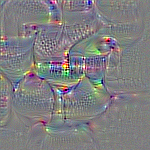

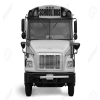

(100, 100)
(150, 150)


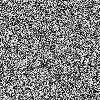

In [113]:
#ravesh e aval
'''
# model.summary()
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

def deprocess_image(x):
  print(x)
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1
  
  x += 0.5
  x = np.clip(x, 0, 1)
  
  x *= 255
  x = np.clip(x, 0, 255).astype('uint8')
  return x

def generate_pattern(layer_name, filter_index, size=150):
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:, :, :, filter_index])

  grads = K.gradients(loss, model.input)[0]
  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

  iterate = K.function([model.input], [loss, grads])
  input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
  
  step = 1.
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
  
  img = input_img_data[0]
  return deprocess_image(img)

plt.imshow(generate_pattern('conv2d_2', 3))

# # layer_name = 'conv2d_2'
# layer_name="block5_conv3"
# size = 512
# margin = 5

# results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))
# for i in range(8):
#   for j in range(8):
#     filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
    
#     horizontal_start = i * size + i * margin
#     horizontal_end = horizontal_start + size
#     vertical_start = j * size + j * margin
#     vertical_end = vertical_start + size
#     results[horizontal_start:horizontal_end,
#             vertical_start:vertical_end] = filter_img/255

# plt.figure(figsize=(20, 20))
# plt.imshow(results)
'''
#ravesh e dovom:
# vgg_conv.summary()
model.summary()
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow

def deprocess_image(x):
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1
  
  x += 0.5
  x = np.clip(x, 0, 1)
  
  x *= 255
  x = np.clip(x, 0, 255).astype('uint8')
  return x

def generate_pattern(layer_name, filter_index, size=150):
  # vgg_conv.summary()
  layer_output = model.get_layer(layer_name).output
  # layer_output = vgg_conv.get_layer(layer_name).output
  loss = K.mean(layer_output[:, :, :, filter_index])

  grads = K.gradients(loss, model.input)[0]
  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

  iterate = K.function([model.input], [loss, grads])
  input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
  
  step = 1.
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
  
  img = input_img_data[0]
  return deprocess_image(img)

# cv2_imshow(generate_pattern('conv2d_2', 1))
 
 
# # layer_name = 'conv2d_2'
# layer_name='block5_conv3'
# size = 64
# margin = 5
 
# results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))
 
# for i in range(2):
#   print(i*100/8)
#   for j in range(1):
#     filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
    
#     horizontal_start = i * size + i * margin
#     horizontal_end = horizontal_start + size
#     vertical_start = j * size + j * margin
#     vertical_end = vertical_start + size
#     results[horizontal_start:horizontal_end,
#             vertical_start:vertical_end] = filter_img/255
 
# plt.figure(figsize=(20, 20))
# plt.imshow(results)

cv2_imshow(generate_pattern('conv2d_13', 1))
kernel=generate_pattern('conv2d_13', 1)
kernel= cv2.cvtColor(kernel, cv2.COLOR_BGR2GRAY)

# from scipy.ndimage import convolve
img=cv2.imread("/content/assign2/train/1/allowed-3.jpg")
dim = (100,100)
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

print(img.shape)
print(kernel.shape)
out=convolve(img,kernel)
cv2_imshow(out)


برای اینکه از عکس های مختلف استفاده نمایم در یک فایل جداگانه نوشتم و لینک آنرا در اینجا قرار میدهم.
https://docs.google.com/document/d/1qc9p124EcTSII4Mhn1w-0hHU0j72rtC8ygE8qoI1FTo/edit?usp=sharing



# Submission

Congratulations! You finished the assignment & you're ready to submit your work. Please follow the instruction:

1. Check and review your answers. Make sure all of the cell outputs are what you want. 
2. Select File > Save.
3. Run **Create Submission** cell, It may take several minutes and it may ask you for your credential.
4. Run **Download Submission** cell to obtain your submission as a zip file.
5. Grab downloaded file (`dl_asg02__xx__xx.zip`) and submit it via [https://forms.gle/Fb7gvVJHp8RePvo6A](https://forms.gle/Fb7gvVJHp8RePvo6A).

**Note: ** We need your Github token to create (if doesn't exist previously) new repository to store learned model data. Also Google Drive token enables us to download the current notebook & create a submission. If you are interested feel free to check our code.

## Create Submission (Run the cell)

In [0]:
#@title
! pip install -U --quiet PyDrive > /dev/null
! wget -q https://github.com/github/hub/releases/download/v2.10.0/hub-linux-amd64-2.10.0.tgz 
  
import os
import time
import yaml
import json

from google.colab import files
from IPython.display import Javascript
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

asg_name = 'assignment_02'
script_save = '''
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});
'''
repo_name = 'iust-deep-learning-assignments'
submission_file_name = 'dl_asg02__%s__%s.zip'%(student_id, student_name.lower().replace(' ',  '_'))

! tar xf hub-linux-amd64-2.10.0.tgz
! cd hub-linux-amd64-2.10.0/ && chmod a+x install && ./install
! hub config --global hub.protocol https
! hub config --global user.email "$Your_Github_account_Email"
! hub config --global user.name "$student_name"
! hub api --flat -X GET /user
! hub api -F affiliation=owner -X GET /user/repos > repos.json

repos = json.load(open('repos.json'))
repo_names = [r['name'] for r in repos]
has_repository = repo_name in repo_names
if not has_repository:
  get_ipython().system_raw('! hub api -X POST -F name=%s /user/repos > repo_info.json' % repo_name)
  repo_info = json.load(open('repo_info.json')) 
  repo_url = repo_info['clone_url']
else:
  for r in repos:
    if r['name'] == repo_name:
      repo_url = r['clone_url']
  
stream = open("/root/.config/hub", "r")
token = list(yaml.load_all(stream))[0]['github.com'][0]['oauth_token']
repo_url_with_token = 'https://'+token+"@" +repo_url.split('https://')[1]

! git clone "$repo_url_with_token"
! cp -r "$ASSIGNMENT_PATH" "$repo_name"/
! cd "$repo_name" && git add -A
! cd "$repo_name" && git commit -m "Add assignment 02 results"
! cd "$repo_name" && git push -u origin master

sub_info = {
    'student_id': student_id,
    'student_name': student_name, 
    'repo_url': repo_url,
    'asg_dir_contents': os.listdir(str(ASSIGNMENT_PATH)),
    'dateime': str(time.time()),
    'asg_name': asg_name
}
json.dump(sub_info, open('info.json', 'w'))

Javascript(script_save)

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = drive.ListFile({'q':"title='%s.ipynb'"%asg_name}).GetList()[0]['id']
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('%s.ipynb'%asg_name) 

! jupyter nbconvert --to script "$asg_name".ipynb > /dev/null
! jupyter nbconvert --to html "$asg_name".ipynb > /dev/null
! zip "$submission_file_name" "$asg_name".ipynb "$asg_name".html "$asg_name".txt info.json > /dev/null

print("##########################################")
print("Done! Submisson created, Please download using the bellow cell!")

.login	aSafarpoor
.id	37835450
.node_id	MDQ6VXNlcjM3ODM1NDUw
.avatar_url	https://avatars2.githubusercontent.com/u/37835450?v=4
.gravatar_id	
.url	https://api.github.com/users/aSafarpoor
.html_url	https://github.com/aSafarpoor
.followers_url	https://api.github.com/users/aSafarpoor/followers
.following_url	https://api.github.com/users/aSafarpoor/following{/other_user}
.gists_url	https://api.github.com/users/aSafarpoor/gists{/gist_id}
.starred_url	https://api.github.com/users/aSafarpoor/starred{/owner}{/repo}
.subscriptions_url	https://api.github.com/users/aSafarpoor/subscriptions
.organizations_url	https://api.github.com/users/aSafarpoor/orgs
.repos_url	https://api.github.com/users/aSafarpoor/repos
.events_url	https://api.github.com/users/aSafarpoor/events{/privacy}
.received_events_url	https://api.github.com/users/aSafarpoor/received_events
.type	User
.site_admin	false
.name	ali safarpoor
.company	
.blog	
.location	
.email	
.hireable	
.bio	
.public_repos	15
.public_gists	1
.followers	14

## Download Submission (Run the cell)

In [0]:
#@title
files.download(submission_file_name)

If that cell makes an error when running you can download file dl_asg02_your_struden_id_your_name.zip from left panel and files section by right-clicking on it and choosing download button.

# Special Thanks

Special thanks to Amirhossein Kazemnejad and Kiamehr Razaee for creating the template of deep learning course assignments.